In [199]:
import pandas as pd
import numpy as np
import yfinance as yf
import datetime
from datetime import date, timedelta
import os

today = date.today()

d1 = today.strftime("%Y-%m-%d")
end_date = d1
d2 = date.today() - timedelta(days=5000)
d2 = d2.strftime("%Y-%m-%d")
start_date = d2

data = yf.download('NFLX',
                      start=start_date,
                      end=end_date,
                      progress=False)
data["Date"] = data.index
data = data[["Date", "Open", "High", "Low", "Close", "Adj Close", "Volume"]]
data.reset_index(drop=True, inplace=True)
print(data.tail())

           Date        Open        High         Low       Close   Adj Close  \
3439 2024-06-10  641.010010  644.789978  635.590027  644.500000  644.500000   
3440 2024-06-11  640.719971  650.190002  640.520020  648.549988  648.549988   
3441 2024-06-12  652.210022  655.780029  643.109985  650.059998  650.059998   
3442 2024-06-13  644.000000  655.250000  642.349976  653.260010  653.260010   
3443 2024-06-14  655.049988  675.580017  652.640015  669.380005  669.380005   

       Volume  
3439  2066800  
3440  2167400  
3441  2094400  
3442  1863600  
3443  4403600  


In [200]:

data.to_csv('data.csv')


In [201]:
import csv
from datetime import datetime

timesteps = []
btc_price = []
with open("/content/data.csv", "r") as f:
  csv_reader = csv.reader(f, delimiter=",")
  next(csv_reader) # skip first line (this gets rid of the column titles)
  for line in csv_reader:
    timesteps.append(datetime.strptime(line[1], "%Y-%m-%d")) # get the dates as dates (not strings)
    btc_price.append(float(line[2])) # get the closing price as float

# View first 10 of each
timesteps[:10], btc_price[:10]

([datetime.datetime(2010, 10, 8, 0, 0),
  datetime.datetime(2010, 10, 11, 0, 0),
  datetime.datetime(2010, 10, 12, 0, 0),
  datetime.datetime(2010, 10, 13, 0, 0),
  datetime.datetime(2010, 10, 14, 0, 0),
  datetime.datetime(2010, 10, 15, 0, 0),
  datetime.datetime(2010, 10, 18, 0, 0),
  datetime.datetime(2010, 10, 19, 0, 0),
  datetime.datetime(2010, 10, 20, 0, 0),
  datetime.datetime(2010, 10, 21, 0, 0)],
 [21.719999313354492,
  21.534286499023438,
  21.959999084472656,
  22.58571434020996,
  21.98714256286621,
  21.932857513427734,
  22.34428596496582,
  21.472856521606445,
  21.428571701049805,
  24.219999313354492])

In [202]:
df = data[['Date', 'Close']]

df

,Date,Close
0,2010-10-08,21.377144
1,2010-10-11,21.955713
2,2010-10-12,22.198570
3,2010-10-13,22.087143
4,2010-10-14,21.825714
...,...,...
3439,2024-06-10,644.500000
3440,2024-06-11,648.549988
3441,2024-06-12,650.059998
3442,2024-06-13,653.260010


In [203]:
df.index = df.pop('Date')
df

,Close
Date,
2010-10-08,21.377144
2010-10-11,21.955713
2010-10-12,22.198570
2010-10-13,22.087143
2010-10-14,21.825714
...,...
2024-06-10,644.500000
2024-06-11,648.549988
2024-06-12,650.059998


In [204]:
timesteps = df.index.to_numpy()
prices = df["Close"].to_numpy()

timesteps[:10], prices[:10]

(array(['2010-10-08T00:00:00.000000000', '2010-10-11T00:00:00.000000000',
        '2010-10-12T00:00:00.000000000', '2010-10-13T00:00:00.000000000',
        '2010-10-14T00:00:00.000000000', '2010-10-15T00:00:00.000000000',
        '2010-10-18T00:00:00.000000000', '2010-10-19T00:00:00.000000000',
        '2010-10-20T00:00:00.000000000', '2010-10-21T00:00:00.000000000'],
       dtype='datetime64[ns]'),
 array([21.37714386, 21.95571327, 22.19857025, 22.08714294, 21.82571411,
        22.24571419, 21.8571434 , 21.33285713, 21.87857056, 24.67000008]))

In [205]:
# Create train and test splits the right way for time series data
split_size = int(0.8 * len(prices)) # 80% train, 20% test - you can change these values as needed, e.g. 90/10, 95/5

# Create train data splits (everything before the split)
X_train, y_train = timesteps[:split_size], prices[:split_size]

# Create test data splits (everything beyond the split)
X_test, y_test = timesteps[split_size:], prices[split_size:]

len(X_train), len(X_test), len(y_train), len(y_test)

(2755, 689, 2755, 689)

In [206]:
# Let's introduce a turkey prolbme to our BTC data (price of BTC falls 100x in one day)
btc_price_turkey = btc_price.copy()
btc_price_turkey[-1] = btc_price_turkey[-1] / 100

In [207]:
# Manufacture an extra price on the end (to showcase our Turkey problem)
btc_price_turkey[-10:]

[645.219970703125,
 633.780029296875,
 634.02001953125,
 644.8900146484375,
 649.3800048828125,
 641.010009765625,
 640.719970703125,
 652.2100219726562,
 644.0,
 6.5504998779296875]

In [208]:
# Get the timesteps for the turkey problem
btc_timesteps_turkey = np.array(df.index)
btc_timesteps_turkey[-10:]

array(['2024-06-03T00:00:00.000000000', '2024-06-04T00:00:00.000000000',
       '2024-06-05T00:00:00.000000000', '2024-06-06T00:00:00.000000000',
       '2024-06-07T00:00:00.000000000', '2024-06-10T00:00:00.000000000',
       '2024-06-11T00:00:00.000000000', '2024-06-12T00:00:00.000000000',
       '2024-06-13T00:00:00.000000000', '2024-06-14T00:00:00.000000000'],
      dtype='datetime64[ns]')

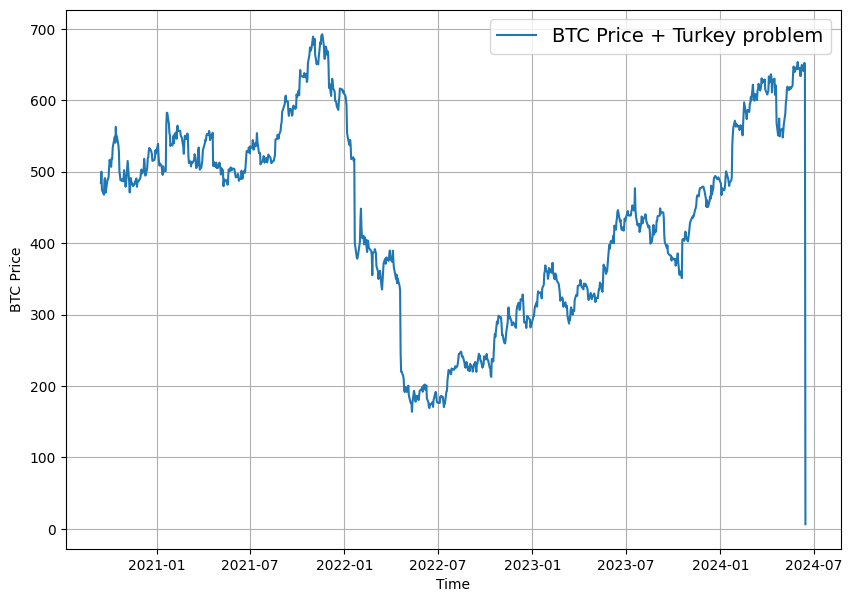

In [209]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 7))
plot_time_series(timesteps=btc_timesteps_turkey,
                 values=btc_price_turkey,
                 format="-",
                 label="BTC Price + Turkey problem",
                 start=2500
                 )

In [210]:
HORIZON = 1
WINDOW_SIZE = 7

In [211]:
import numpy as np

# Create function to view NumPy arrays as windows
def make_windows(x, window_size=WINDOW_SIZE, horizon=HORIZON):
  """
  Turns a 1D array into a 2D array of sequential labelled windows of window_size with horizon size labels.
  """
  # 1. Create a window of specific window_size (add the horzion on the end for labelling later)
  window_step = np.expand_dims(np.arange(window_size+horizon), axis=0)

  # 2. Create a 2D array of multiple window steps (minus 1 to account for 0 indexing)
  window_indexes = window_step + np.expand_dims(np.arange(len(x)-(window_size+horizon-1)), axis=0).T # create 2D array of windows of size window_size
  # print(f"Window indexes:\n {window_indexes, window_indexes.shape}")

  # 3. Index on the target array (a time series) with 2D array of multiple window steps
  windowed_array = x[window_indexes]
  # print(windowed_array)

  # 4. Get the labelled windows
  windows, labels = get_labelled_windows(windowed_array, horizon=horizon)
  return windows, labels

In [212]:
# Create function to label windowed data
def get_labelled_windows(x, horizon=HORIZON):
  """
  Creates labels for windowed dataset.

  E.g. if horizon=1
  Input: [0, 1, 2, 3, 4, 5, 6, 7] -> Output: ([0, 1, 2, 3, 4, 5, 6], [7])
  """
  return x[:, :-horizon], x[:, -horizon:]

In [213]:
# Make the train/test splits
def make_train_test_splits(windows, labels, test_split=0.2):
  """
  Splits matching pairs of winodws and labels into train and test splits.
  """
  split_size = int(len(windows) * (1-test_split)) # this will default to 80% train/20% test
  train_windows = windows[:split_size]
  train_labels = labels[:split_size]
  test_windows = windows[split_size:]
  test_labels = labels[split_size:]
  return train_windows, test_windows, train_labels, test_labels

In [214]:
# Eğitim ve test pencereleri oluşturun
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(full_windows, full_labels)
print(f"Eğitim pencereleri: {len(train_windows)}, Test pencereleri: {len(test_windows)}")
print(f"Eğitim etiketleri: {len(train_labels)}, Test etiketleri: {len(test_labels)}")


Eğitim pencereleri: 2749, Test pencereleri: 688
Eğitim etiketleri: 2749, Test etiketleri: 688


In [215]:
# Create train and test sets for turkey problem data
full_windows, full_labels = make_windows(np.array(btc_price_turkey), window_size=WINDOW_SIZE, horizon=HORIZON)

X_train, X_test, y_train, y_test = make_train_test_splits(full_windows, full_labels)
len(X_train), len(X_test), len(y_train), len(y_test)

(2749, 688, 2749, 688)

## Bir Türkiye modeli oluşturun (Türkiye verileri üzerinden tahminde bulunacak model)

In [216]:
import os

# Create a function to implement a ModelCheckpoint callback with a specific filename
def create_model_checkpoint(model_name, save_path="model_experiments"):
  return tf.keras.callbacks.ModelCheckpoint(filepath=os.path.join(save_path, model_name),
                                            monitor="val_loss",
                                            verbose=0, # only output a limited amount of text
                                            save_best_only=True)

In [217]:
import tensorflow as tf
from tensorflow.keras import layers

# Set random seed for as reproducible results as possible
tf.random.set_seed(42)

# 1. Construct model
model_1 = tf.keras.Sequential([
  layers.Dense(256, activation="relu"),
  layers.Dense(128, activation="relu"),
  layers.Dense(60, activation="relu"),
  layers.Dense(HORIZON, activation="linear") # linear activation is the same as having no activation
], name="model_1_dense") # name our model so we can save it

# 2. Compile
model_1.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["mae", "mse"])



In [198]:
# Clone model 1 architecture for turkey model and fit the turkey model on the turkey data
turkey_model = tf.keras.models.clone_model(model_1)
turkey_model._name = "model_10_turkey_model"
turkey_model.compile(loss="mae",
                     optimizer=tf.keras.optimizers.Adam())
turkey_model.fit(X_train, y_train,
                 epochs=300,
                 verbose=0,
                 batch_size=135,
                 validation_data=(X_test, y_test),
                 callbacks=[create_model_checkpoint(turkey_model.name)])

In [218]:
# Pencereleri ve etiketleri eğitim ve test setlerine ayırmak için bir fonksiyon oluşturun
def make_train_test_splits(windows, labels, test_split=0.2):
    """
    Eşleşen pencere ve etiket çiftlerini eğitim ve test setlerine ayırır.
    """
    split_size = int(len(windows) * (1 - test_split))  # Bu, varsayılan olarak %80 eğitim/%20 test olarak ayarlanır
    train_windows = windows[:split_size]
    train_labels = labels[:split_size]
    test_windows = windows[split_size:]
    test_labels = labels[split_size:]
    return train_windows, test_windows, train_labels, test_labels
    # train_windows, train_labels, test_windows, test_labels: Pencere ve etiketleri belirtilen oranda (varsayılan %80 eğitim, %20 test) eğitim ve test setlerine ayırır ve döndürür.


In [219]:
# Evaluate model on test data
turkey_model.evaluate(X_test, y_test)

22/22 [==============================] - 0s 2ms/step - loss: 8.9907


8.990659713745117

In [220]:
# Load best performing turkey model and evaluate on test data
turkey_model = tf.keras.models.load_model("model_experiments/model_10_turkey_model")
turkey_model.evaluate(X_test, y_test)

22/22 [==============================] - 0s 3ms/step - loss: 8.3430


8.342998504638672

In [221]:
def make_preds(model, input_data):
  """
  Uses model to make predictions input_data.
  """
  forecast = model.predict(input_data)
  return tf.squeeze(forecast) # return 1D array of predictions

In [222]:
# Make predictions with turkey model
turkey_preds = make_preds(turkey_model, X_test)
turkey_preds[:10]

22/22 [==============================] - 0s 2ms/step


<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([587.6103 , 580.40906, 580.0014 , 589.7245 , 592.4377 , 589.12384,
       589.76965, 588.9472 , 605.982  , 605.1693 ], dtype=float32)>

In [223]:
# Create a function to take in model predictions and truth values and return evaluation metrics
def evaluate_preds(y_true, y_pred):
  # Make sure float32 datatype (for metric calculations)
  y_true = tf.cast(y_true, dtype=tf.float32)
  y_pred = tf.cast(y_pred, dtype=tf.float32)

  # Calculate various evaluation metrics
  mae = tf.keras.metrics.mean_absolute_error(y_true, y_pred)
  mse = tf.keras.metrics.mean_squared_error(y_true, y_pred)
  rmse = tf.sqrt(mse)
  mape = tf.keras.metrics.mean_absolute_percentage_error(y_true, y_pred)
  mase = mean_absolute_scaled_error(y_true, y_pred)

  return {"mae": mae.numpy(),
          "mse": mse.numpy(),
          "rmse": rmse.numpy(),
          "mape": mape.numpy(),
          "mase": mase.numpy()}

In [224]:
# MASE implementation
def mean_absolute_scaled_error(y_true, y_pred):
  """
  Implement MASE (assuming no seasonality of data).
  """
  mae = tf.reduce_mean(tf.abs(y_true-y_pred))

  # Find MAE of naive forecast (no seasonality)
  mae_naive_no_season = tf.reduce_mean(tf.abs(y_true[1:] - y_true[:-1])) # our seasonality is 1 day (hence the shift of 1)

  return mae / mae_naive_no_season

In [225]:
# Evaluate turkey preds
turkey_results = evaluate_preds(y_true=y_test,
                                y_pred=turkey_preds)
turkey_results

{'mae': array([188.38737 , 189.17767 , 195.77594 , 196.82504 , 194.05084 ,
        194.68272 , 194.68877 , 206.9171  , 204.34662 , 210.65517 ,
        206.1617  , 222.1587  , 234.19627 , 227.16624 , 226.33873 ,
        226.18654 , 225.47894 , 225.52097 , 230.48474 , 225.41174 ,
        229.58649 , 220.052   , 222.74155 , 242.86546 , 254.05441 ,
        263.63715 , 259.06042 , 260.92688 , 262.95972 , 278.6436  ,
        272.76675 , 267.04514 , 275.50436 , 254.27235 , 241.46857 ,
        244.62022 , 243.97638 , 241.4228  , 250.53036 , 270.92935 ,
        268.01804 , 279.57666 , 281.178   , 281.9165  , 265.83145 ,
        248.81195 , 248.65234 , 264.84106 , 253.5427  , 258.29764 ,
        240.72884 , 213.4103  , 217.80663 , 205.53256 , 215.50758 ,
        223.66086 , 221.67198 , 213.16756 , 209.65965 , 200.72772 ,
        200.38719 , 199.69331 , 196.27893 , 193.14403 , 199.97902 ,
        203.75854 , 212.88008 , 211.83281 , 211.79605 , 208.7549  ,
        210.36444 , 208.2693  , 205.26385

In [226]:
# Create a function to plot time series data
def plot_time_series(timesteps, values, format=".", start=0, end=None, label=None):
  """
  Plots timesteps (a series of points in time) against values (a series of values across timesteps).

  Parameters
  ----------
  timesteps : array of timestep values
  values : array of values across time
  format : style of plot, default "."
  start : where to start the plot (setting a value will index from start of timesteps & values)
  end : where to end the plot (similar to start but for the end)
  label : label to show on plot about values, default None
  """
  # Plot the series
  plt.plot(timesteps[start:end], values[start:end], format, label=label)
  plt.xlabel("Time")
  plt.ylabel("BTC Price")
  if label:
    plt.legend(fontsize=14) # make label bigger
  plt.grid(True)

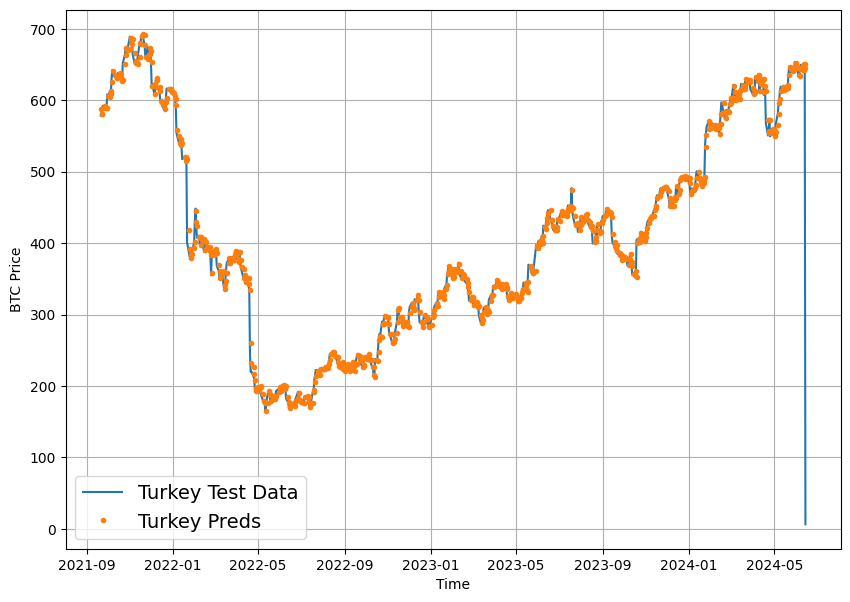

In [227]:
plt.figure(figsize=(10, 7))
offset=0
plot_time_series(timesteps=btc_timesteps_turkey[-len(X_test):],
                 values=btc_price_turkey[-len(y_test):],
                 format="-",
                 label="Turkey Test Data",
                 start=offset)
plot_time_series(timesteps=btc_timesteps_turkey[-len(X_test):],
                 values=turkey_preds,
                 label="Turkey Preds",
                 start=offset);


In [228]:
import datetime
today = datetime.date.today()
model_1_preds = make_preds(turkey_model, test_windows)
print("Tahmini en yüksek fiyat:", model_1_preds[-1])
print("Tarih:", today)


22/22 [==============================] - 0s 2ms/step
Tahmini en yüksek fiyat: tf.Tensor(644.44836, shape=(), dtype=float32)
Tarih: 2024-06-16
